#**2-D Anisotropic Denoising**#

In [ ]:
import numpy as np
from scipy.ndimage import correlate1d
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=np.nan)
np.random.seed(0)

**Step 1**:

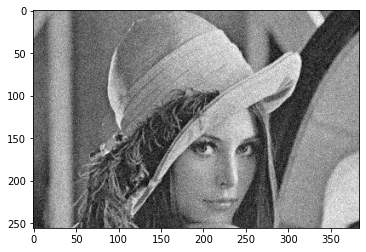

In [ ]:
img = plt.imread('lena-noisy.png').astype(float)
plt.imshow(img, cmap='gray')

In [ ]:
# Objective, gradient, and projection functions for denoising dual
f_obj = lambda y, gam: .5*np.sum((y - DT(gam))**2)
f_grad = lambda y, gam: DDT(gam) - D(y)
f_prox = lambda z, lam: np.clip(z, -1*lam, lam)

x_targ = lambda vec, astep, az_vec, agam_vec: 1/(astep + 1)*(vec - astep*(az_vec + agam_vec))


In [ ]:
# proximal gradient descent
def prox_gd(f, fp, prox, yin, lam, gam_init, ss, maxit, tol):
  gam = gam_init
  cur_it = 0
  cur_loss = f(yin, gam)
  next_loss = cur_loss

  while (cur_it <= maxit) and (cur_loss > tol):
    prev_loss = next_loss
    interm = gam - ss*fp(yin, gam)
    gam = prox(interm, lam)
    next_loss = f(yin, gam)

    cur_it += 1
    cur_loss = abs(next_loss - prev_loss) / abs(prev_loss)

  # dual-to-primal step
  xout = yin - DT(gam)

  return xout


# filtering functions
def D(xx):
  h_filt = np.array([-1, 1])

  res = correlate1d(xx, h_filt, origin=-1)[:-1]

  return res


def DT(yy):
  t_filt = np.array([1, -1])

  res = correlate1d(np.append(yy, 0), t_filt, mode='constant')

  return res


def DDT(xx):
  yy = DT(xx)

  res = D(yy)

  return res


# admm
def mc_admm(in_im, lam, t, maxit_a, maxit_p, tol_a, tol_p):
  # init arrays
  X = in_im.copy()
  Z = in_im.copy()
  G = in_im.copy()

  admm_it = 0
  admm_loss = 1

  step_size = 1 / 4 # by lipschitz continuity

  while (admm_it <= maxit_a) and (admm_loss > tol_a):
    X_prev = X.copy()
    Z_prev = Z.copy()

    # update X
    for jj in range(X.shape[1]):
      gam_init = np.zeros(X.shape[0]-1)
      X[:,jj] = prox_gd(f_obj, f_grad, f_prox, x_targ(X[:, jj], t, Z[:, jj],
                                                      G[:, jj]), lam/(t+1),
                        gam_init, step_size, maxit_p, tol_p)

    # Update Z
    for ii in range(X.shape[0]):
      gam_init = np.zeros(X.shape[1]-1)
      Z[ii,:] = prox_gd(f_obj, f_grad, f_prox, Z[ii,:] + G[ii,:],
                        lam/(t), gam_init, step_size, maxit_p, tol_p)

    # update gamma
    G = G + X - Z

    # update exit parameters
    admm_it += 1
    admm_loss = np.sum((X - X_prev)**2)

  return X, Z, admm_it

In [ ]:
# test run
test_its_a = 1000
test_tol_a = float('1e-6')

test_its_p = 100
test_tol_p = float('1e-3')

testx, testz, q = mc_admm(img, 1, 2, test_its_a, test_its_p, test_tol_a, test_tol_p)

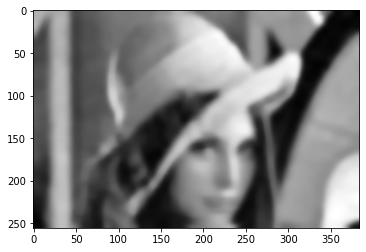

In [ ]:
plt.imshow(testx, cmap='gray')

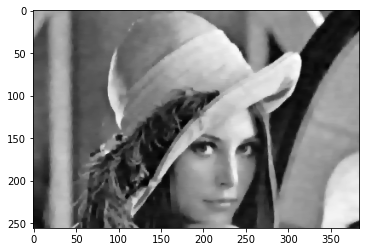

In [ ]:
# test run
test_its_a = 1000
test_tol_a = float('1e-6')

test_its_p = 100
test_tol_p = float('1e-3')

testx, testz, q = mc_admm(img, .05, 2, test_its_a, test_its_p, test_tol_a, test_tol_p)
plt.imshow(testx, cmap='gray')

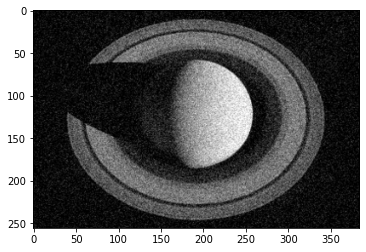

In [ ]:
img_s = plt.imread('saturn-noisy.png').astype(float)
plt.imshow(img_s, cmap='gray')

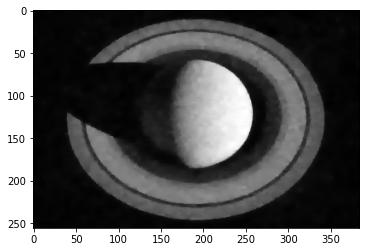

In [ ]:
testx, testz, q = mc_admm(img_s, .05, 2, test_its_a, test_its_p, test_tol_a, test_tol_p)
plt.imshow(testx, cmap='gray')

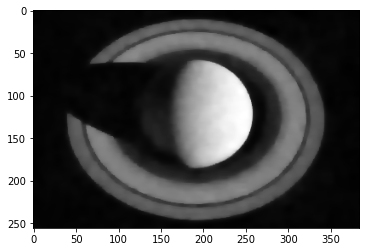

In [ ]:
testx, testz, q = mc_admm(img_s, .1, 2, test_its_a, test_its_p, test_tol_a, test_tol_p)
plt.imshow(testx, cmap='gray')